# Goals

- Find out the two best markets to advertise our products.
    - Where are the new coders located.
    - What are the locations with the greatest number of new coders.
    - How much money new coders are willing to spend on learning.

## Data
[freeCodeCamp's 2017 New Coder Survey](https://www.freecodecamp.org/news/we-asked-20-000-people-who-they-are-and-how-theyre-learning-to-code-fff5d668969/) is used in this project. [freeCodeCamp](https://www.freecodecamp.org/) is a free e-learning platform that offers courses on web development. Because they [run a popular Medium publication](https://medium.freecodecamp.org/) (over 400,000 followers), their survey attracted new coders with varying interests (not only web development), which is ideal for the purpose of our analysis.

The survey data is publicly available in [this GitHub repository](https://github.com/freeCodeCamp/2017-new-coder-survey).

In [1]:
import pandas as pd
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
## Import Data
df_fcc = pd.read_csv('2017-fCC-New-Coders-Survey-Data.csv', low_memory=False)
df_fcc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18175 entries, 0 to 18174
Columns: 136 entries, Age to YouTubeTheNewBoston
dtypes: float64(105), object(31)
memory usage: 18.9+ MB


In [2]:
df_fcc.head()

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,CodeEventFCC,CodeEventGameJam,CodeEventGirlDev,CodeEventHackathons,CodeEventMeetup,CodeEventNodeSchool,CodeEventNone,CodeEventOther,CodeEventRailsBridge,CodeEventRailsGirls,CodeEventStartUpWknd,CodeEventWkdBootcamps,CodeEventWomenCode,CodeEventWorkshops,CommuteTime,CountryCitizen,CountryLive,EmploymentField,EmploymentFieldOther,EmploymentStatus,EmploymentStatusOther,ExpectedEarning,FinanciallySupporting,FirstDevJob,Gender,GenderOther,HasChildren,HasDebt,HasFinancialDependents,HasHighSpdInternet,HasHomeMortgage,HasServedInMilitary,HasStudentDebt,HomeMortgageOwe,HoursLearning,ID.x,ID.y,Income,IsEthnicMinority,IsReceiveDisabilitiesBenefits,IsSoftwareDev,IsUnderEmployed,JobApplyWhen,JobInterestBackEnd,JobInterestDataEngr,JobInterestDataSci,JobInterestDevOps,JobInterestFrontEnd,JobInterestFullStack,JobInterestGameDev,JobInterestInfoSec,JobInterestMobile,JobInterestOther,JobInterestProjMngr,JobInterestQAEngr,JobInterestUX,JobPref,JobRelocateYesNo,JobRoleInterest,JobWherePref,LanguageAtHome,MaritalStatus,MoneyForLearning,MonthsProgramming,NetworkID,Part1EndTime,Part1StartTime,Part2EndTime,Part2StartTime,PodcastChangeLog,PodcastCodeNewbie,PodcastCodePen,PodcastDevTea,PodcastDotNET,PodcastGiantRobots,PodcastJSAir,PodcastJSJabber,PodcastNone,PodcastOther,PodcastProgThrowdown,PodcastRubyRogues,PodcastSEDaily,PodcastSERadio,PodcastShopTalk,PodcastTalkPython,PodcastTheWebAhead,ResourceCodecademy,ResourceCodeWars,ResourceCoursera,ResourceCSS,ResourceEdX,ResourceEgghead,ResourceFCC,ResourceHackerRank,ResourceKA,ResourceLynda,ResourceMDN,ResourceOdinProj,ResourceOther,ResourcePluralSight,ResourceSkillcrush,ResourceSO,ResourceTreehouse,ResourceUdacity,ResourceUdemy,ResourceW3S,SchoolDegree,SchoolMajor,StudentDebtOwe,YouTubeCodeCourse,YouTubeCodingTrain,YouTubeCodingTut360,YouTubeComputerphile,YouTubeDerekBanas,YouTubeDevTips,YouTubeEngineeredTruth,YouTubeFCC,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston
0,27.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15 to 29 minutes,Canada,Canada,software development and IT,NaN,Employed for wages,NaN,NaN,NaN,NaN,female,NaN,NaN,1.0,0.0,1.0,0.0,0.0,0.0,NaN,15.0,02d9465b21e8bd09374b0066fb2d5614,eb78c1c3ac6cd9052aec557065070fbf,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,start your own business,NaN,NaN,NaN,English,married or domestic partnership,150.0,6.0,6f1fbc6b2b,2017-03-09 00:36:22,2017-03-09 00:32:59,2017-03-09 00:59:46,2017-03-09 00:36:26,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,"some college credit, no degree",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,34.0,0.0,NaN,NaN,NaN,NaN,NaN,"less than 100,000",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,United States of America,United States of America,NaN,NaN,Not working but looking for work,NaN,35000.0,NaN,NaN,male,NaN,NaN,1.0,0.0,1.0,0.0,0.0,1.0,NaN,10.0,5bfef9ecb211ec4f518cfc1d2a6f3e0c,21db37adb60cdcafadfa7dca1b13b6b1,NaN,0.0,0.0,0.0,NaN,Within 7 to 12 months,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,work for a nonprofit,1.0,Full-Stack Web Developer,in an office with other developers,English,"single, never married",80.0,6.0,f8f8be6910,2017-03-09 00:37:07,2017-03-09 00:33:26,2017-03-09 00:38:59,2017-03-09 00:37:10,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,1.0,"some college credit, no degree",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,21.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,NaN,

In [3]:
df_fcc['JobRoleInterest'].value_counts(normalize = True).sort_values(ascending = False)*100

Full-Stack Web Developer                                                                                                                                                                                    11.770595
  Front-End Web Developer                                                                                                                                                                                    6.435927
  Data Scientist                                                                                                                                                                                             2.173913
Back-End Web Developer                                                                                                                                                                                       2.030892
  Mobile Developer                                                                                                                              

The frequency table is granulated, impplies there are a lot of unique value in the column, let check how does the columns actually look like

In [4]:
df_fcc['JobRoleInterest'].head(10)

0                                                  NaN
1                             Full-Stack Web Developer
2      Front-End Web Developer, Back-End Web Develo...
3      Front-End Web Developer, Full-Stack Web Deve...
4    Full-Stack Web Developer, Information Security...
5                                                  NaN
6                             Full-Stack Web Developer
7                                                  NaN
8                                                  NaN
9    Full-Stack Web Developer,   Quality Assurance ...
Name: JobRoleInterest, dtype: object

In [5]:
df_fcc['JobRoleInterest'].isnull().sum()/len(df_fcc['JobRoleInterest'])

0.6152957359009629

# Column description
## `JobRoleInterest`
It allows selecting multiple interested roles, which is the reason the granularity of the table. It contains quite a lot of null value, over 60% of data are missing. Droping them raises the question that if the sample still valid and representation for our purpose?

In [6]:
# Split each string in the 'JobRoleInterest' column
interests_no_nulls = df_fcc['JobRoleInterest'].dropna()
splitted_interests = interests_no_nulls.str.split(',')
splitted_interests.head()

1                           [Full-Stack Web Developer]
2    [  Front-End Web Developer,  Back-End Web Deve...
3    [  Front-End Web Developer,  Full-Stack Web De...
4    [Full-Stack Web Developer,  Information Securi...
6                           [Full-Stack Web Developer]
Name: JobRoleInterest, dtype: object

## How many interested role are they choosing?

In [7]:
n_options = splitted_interests.apply(lambda x: len(x))
n_options.value_counts(normalize = True)

1     0.316505
3     0.158896
4     0.152174
5     0.120423
2     0.108839
6     0.067220
7     0.038616
8     0.017592
9     0.009868
10    0.004720
12    0.003003
11    0.001859
13    0.000286
Name: JobRoleInterest, dtype: float64

Just above 30% of the observation only interested in a signle role, in other 
words, over 70% of the respondant do not have a relatively clear idea which niche they would like to work in, but have interest in multiple disciplines.

## Which role is the most interested?
The focus of our courses is on *web and mobile development*, so let's find out how many respondents chose at least one of these two options.

full-stack web developer    0.185752
front-end web developer     0.156327
back-end web developer      0.122655
mobile developer            0.101991
data scientist              0.072699
game developer              0.072035
user experience designer    0.065000
information security        0.058673
data engineer               0.055221
devops / sysadmin           0.041018
dtype: float64


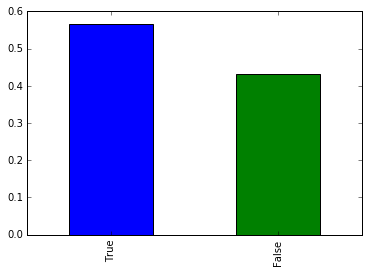

In [8]:
## create a dictionary for recording every role frequency 
# role = {}

# for i in splitted_interests:
#     for n in range(len(i)):
#         if i[n].strip().lower() in role:
#             role[i[n].strip().lower()] += 1
#         else:
#             role[i[n].strip().lower()] = 1
            
# roles = pd.DataFrame.from_dict(role, orient = 'index')
# roles = roles.rename(columns = {0: 'freq'})
# top_10_interested_roles = roles.sort_values('freq', ascending=False).head(10)
# top_10_interested_roles.plot.bar()
# print('most interested role:', max(role, key = role.get),'\n')
# sorted_role = pd.Series(sorted(role.items(), key = lambda x: x[1], reverse = True))
# print(sorted_role.head())

## creating a serie for recording every role frequency, it is shorter than the dictionary
role = []
for i in splitted_interests:
    for n in range(len(i)):
        role.append(i[n].strip().lower())
roles = pd.Series(role)
print(roles.value_counts(normalize = True).head(10))
roles.str.contains('web|mobile').value_counts(normalize = True).head(10).plot.bar()

we take out every respondent's answer, and evaluate the frequency of the interested role, we found that 4 out of the top-10 interested role are *web and mobile related*.

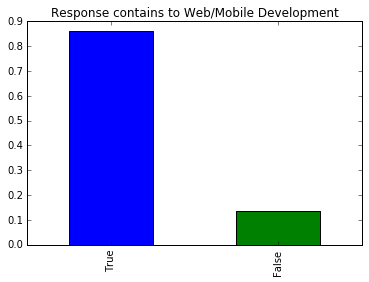

In [9]:
interests_no_nulls.str.contains('Web Developer|Mobile Developer').value_counts(normalize = True).plot.bar(title = 'Response contains to Web/Mobile Development')
# roles.str.contains('web|mobile').value_counts(normalize = True).head(10).plot.bar()
# roles.str.contains('web', flags = re.I).value_counts(normalize = True)
#         if i[n].strip().lower() in role:
#             role[i[n].strip().lower()] += 1
#         else:
#             role[i[n].strip().lower()] = 1
# roles = pd.DataFrame.from_dict(role, orient = 'index')
# roles = roles.rename(columns = {0: 'freq'})
# top_10_interested_roles = roles.sort_values('freq', ascending=False).head(10)
# top_10_interested_roles.plot.bar()
# print('max:', max(role, key = role.get))
# sorted_role = pd.Series(sorted(role.items(), key = lambda x: x[1], reverse = True))
# sorted_role

over 85% of the respondent include web/mobile development role as one of their interests. These figures offer us a strong reason to consider this sample representative for our population of interes even we drop the null row 

In [10]:
# drop the null roll
df_fcc = df_fcc[df_fcc['JobRoleInterest'].notnull()]

In [11]:
df_fcc.shape

(6992, 136)

6992 observation remains after dropping.

# Locations and Densities

In [12]:
a_f = df_fcc['CountryLive'].value_counts()
r_f = df_fcc['CountryLive'].value_counts(normalize = True)*100
pd.DataFrame( {'Absolute frequency': a_f, 'Percentage': round(r_f,2)})

,Absolute frequency,Percentage
United States of America,3125,45.70
India,528,7.72
United Kingdom,315,4.61
Canada,260,3.80
Poland,131,1.92
Brazil,129,1.89
Germany,125,1.83
Australia,112,1.64
Russia,102,1.49
Ukraine,89,1.30


45.7% of our potential customers are located in the US, and this definitely seems like the most interesting market. India has the second customer density, but it's just 7.7%, which is not too far from the United Kingdom (4.6%) or Canada (3.8%).

This is useful information while we should not conclude here but should go more in depth than this and figure out how much money people are actually willing to spend on learning. Advertising in high-density markets where most people are only willing to learn for free is unlikely to be profitable.

# Finding the monthly expenditure on learning of the new coder

In [13]:
# clean the interested columns
df_fcc[['MoneyForLearning','MonthsProgramming', 'CountryLive']].isnull().sum()/df_fcc[['MoneyForLearning','MonthsProgramming', 'CountryLive']].shape[0]

MoneyForLearning     0.073799
MonthsProgramming    0.051344
CountryLive          0.022025
dtype: float64

There is less than 1% null values, drop for the ease of analysis.

In [14]:
exp_m_c = df_fcc[['MoneyForLearning','MonthsProgramming', 'CountryLive']].dropna()

In [15]:
exp_m_c.describe(include='all')

,MoneyForLearning,MonthsProgramming,CountryLive
count,6212.000000,6212.000000,6212
unique,NaN,NaN,131
top,NaN,NaN,United States of America
freq,NaN,NaN,2933
mean,900.410979,13.458467,NaN
std,4970.743144,28.775824,NaN
min,0.000000,0.000000,NaN
25%,0.000000,2.000000,NaN
50%,10.000000,6.000000,NaN
75%,200.000000,15.000000,NaN


In [16]:
#check if the number of month is zero.
print(exp_m_c['MonthsProgramming'].min())
exp_m_c['MonthsProgramming'] = exp_m_c['MonthsProgramming'].apply(lambda x: 1 if x == 0 else x)

0.0


there is observation assert 0 month of learning to code, it is consider their learning is less than a month, thus, for the rule of thumb, their learning is regarded as 1 month.

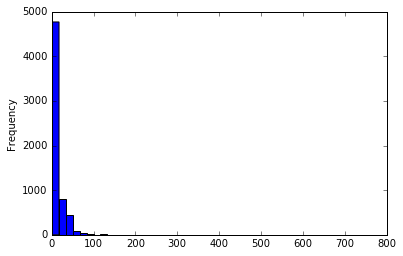

In [17]:
exp_m_c['MonthsProgramming'].plot.hist(bins = 45)

In [18]:
round(exp_m_c['MonthsProgramming'].value_counts(normalize = True , bins = 45).sort_index().head()*100,2)

(0.256, 17.511]     76.75
(17.511, 34.022]    12.88
(34.022, 50.533]     7.08
(50.533, 67.044]     1.45
(67.044, 83.556]     0.63
Name: MonthsProgramming, dtype: float64

The range of `MonthsProgramming` is large, it ranges from 0 to 744.
The distribution is heavily right/positive skewed, over 90% of the sample falls in the 1st and 2nd bin, implying that over 80% of the learner's learning jouney is less that 1.5 years.

In [19]:
exp_m_c['exp_m'] = exp_m_c['MoneyForLearning']/exp_m_c['MonthsProgramming']
interested_c = exp_m_c[exp_m_c['CountryLive'].isin(exp_m_c['CountryLive'].value_counts().head().index)]
interested_c[['CountryLive','exp_m']].groupby(['CountryLive']).mean().sort_values('exp_m',ascending = False)

,exp_m
CountryLive,
United States of America,227.997996
India,135.100982
Canada,113.510961
Poland,75.678935
United Kingdom,45.534443


The results of mean monthly expenditure for the United Kingdom and Canada are surprising relative to the values of India in terms of their respective GDP per capita (india GDP/capita should be the lowest and is expected to have the expenditure relatively lower than developed countries like UK, CA. since mean is used to evaluated, the outliner ould be a reason for this result

# Using boxplot to identity, if any, outliners.

/dataquest/system/env/python3/lib/python3.4/site-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

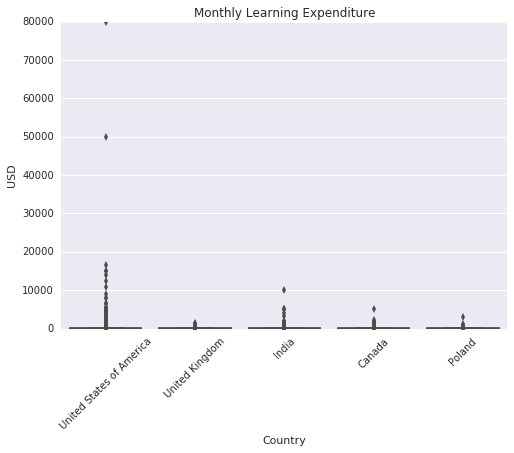

In [20]:
import seaborn as sns
sns.boxplot(data = interested_c, y = 'exp_m', x = 'CountryLive')
plt.title('Monthly Learning Expenditure')
plt.xlabel('Country')
plt.ylabel('USD')
plt.xticks(rotation=45)

Although the above graph show the outliner is more frequent in USA or India, it is hard to if there is anything wrong with the other interested countries. However, we can see immediately that there is something abnormal in the US data that two persons spend >USD 50k/month for learning. 

This outliner is affacting the mean evaluation significantly, so we'll remove every value that >USD 20,000/month for the ease of the analysis.

In [21]:
interested_c = interested_c[interested_c.exp_m<20000]
interested_c[['CountryLive','exp_m']].groupby(['CountryLive']).mean().sort_values('exp_m',ascending = False)

,exp_m
CountryLive,
United States of America,183.800110
India,135.100982
Canada,113.510961
Poland,75.678935
United Kingdom,45.534443


/dataquest/system/env/python3/lib/python3.4/site-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

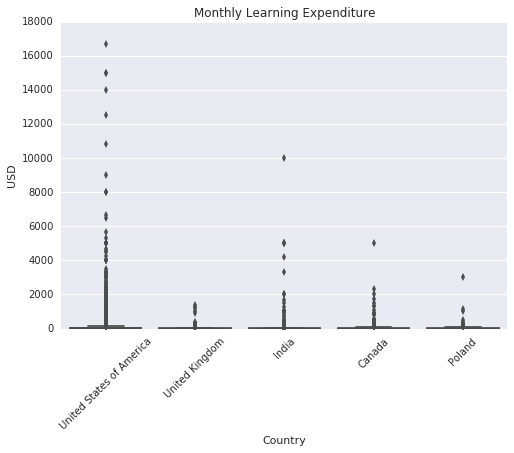

In [22]:
sns.boxplot(data = interested_c, y = 'exp_m', x = 'CountryLive')
plt.title('Monthly Learning Expenditure')
plt.xlabel('Country')
plt.ylabel('USD')
plt.xticks(rotation=45)

The above boxplot provides a closer look. while it is still unclear for which country is a better investment. we can see that in general there are outliner below 200 in every interested country. However, US and India is partcularly prone to outliner than others, one possiblity is that they attended bootcamp.

We further our search in identitfying the reason of outliners of US and India.

In [48]:
india_outliners = interested_c[(interested_c['CountryLive']=='India') & (interested_c['exp_m'] >= 2500)]
usa_outliners = interested_c[(interested_c['CountryLive']=='United States of America') & (interested_c['exp_m'] >= 6000)]
canada_outliners = interested_c[(interested_c['CountryLive']=='Canada') & (interested_c['exp_m'] >= 4000)]
india_outliners = df_fcc.loc[india_outliners.index]
usa_outliners = df_fcc.loc[usa_outliners.index]
canada_outliners = df_fcc.loc[canada_outliners.index]

In [49]:
print('there are in total {num} outliners in India'.format(num = india_outliners.shape[0]))
print('there are in total {num} outliners in USA'.format(num = usa_outliners.shape[0]))
print('there are in total {num} outliners in Canada'.format(num = canada_outliners.shape[0]))

there are in total 0 outliners in India
there are in total 6 outliners in USA
there are in total 1 outliners in Canada


In [43]:
'{num_b} of {num_t} of india outliners partcipate in bootcamp'.format(num_b = int(india_outliners['AttendedBootcamp'].sum()), 
                                                                    num_t = india_outliners.shape[0])

'0 of 0 of india outliners partcipate in bootcamp'

No India outliners attended bootcamps.

The actual question of the survey was *"Aside from university tuition, about how much money have you spent on learning to code so far (in US dollars)?"*

There is possibility that they misunderstood and thought university tuition is included. It seems safer to remove these two rows.

In [36]:
interested_c = interested_c.drop(india_outliners.index)

In [50]:
'{num_b} of {num_t} of USA outliners partcipate in bootcamp'.format(num_b = int(usa_outliners['AttendedBootcamp'].sum()), 
                                                                    num_t = usa_outliners.shape[0])

'6 of 6 of USA outliners partcipate in bootcamp'

In [51]:
'{num_b} of {num_t} of Canada outliners partcipate in bootcamp'.format(num_b = int(canada_outliners['AttendedBootcamp'].sum()), 
                                                                    num_t = canada_outliners.shape[0])

'1 of 1 of Canada outliners partcipate in bootcamp'

remove the outliners which has no attendence in bootcamp

In [53]:
usa_outliners_no_bootcamp = usa_outliners['AttendedBootcamp'][usa_outliners['AttendedBootcamp']==0]
interested_c = interested_c.drop(usa_outliners_no_bootcamp.index)

/dataquest/system/env/python3/lib/python3.4/site-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

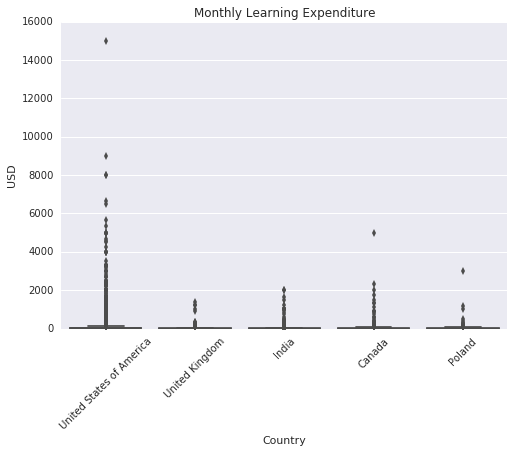

In [55]:
sns.boxplot(data = interested_c, y = 'exp_m', x = 'CountryLive')
plt.title('Monthly Learning Expenditure')
plt.xlabel('Country')
plt.ylabel('USD')
plt.xticks(rotation=45)

# Choosing the Two Best Markets
Obviously, one country we should advertise in is the US. 
Lots of new coders live there and they are willing to pay a good amount of money each month (roughly \$143).

The data suggests strongly that we shouldn't advertise in the UK, but let's take a second look at India before deciding to choose Canada as our second best choice:

$59 doesn't seem like an expensive sum for people in India since they spend on average \$66 each month.
We have almost twice as more potential customers in India than we have in Canada.
with this in mind, we suggest the other market should be Canada.